In [1]:
import networkx as nx
import numpy as np
import pandas as pd  
import os
import glob
import matplotlib as plt
from utils import *
from plot import *
from renormalizer import *
from kuramoto_plot import *
from simplicial_complexes import *

Reading the Data.

In [2]:
#G_full=nx.read_edgelist('Data/metabolic_mtu.txt')
G_full=nx.read_edgelist('Data/darwin.txt')
G_full=nx.convert_node_labels_to_integers(G_full)

In [3]:
print(G_full.number_of_nodes())
print(G_full.number_of_edges())

7381
44207


In [4]:
print(nx.is_connected(G_full))

False


Get the giant component

In [5]:
Gcc=sorted(nx.connected_components(G_full))
G0=G_full.subgraph(Gcc[0])
G0=nx.convert_node_labels_to_integers(G0)

In [6]:
print(G0.number_of_nodes())
print(Average_degree(G0))
print(nx.average_clustering(G0))

7377
11.984546563643757
0.40851912747508384


In [7]:
annd=nx.average_neighbor_degree(G0)
print(sum(annd.values())/k_0(G0))
annd_vec=list(annd.values())

print(2*G0.number_of_edges())
degrees = [G0.degree(n) for n in G0.nodes()]
E2=0
for j in range(len(degrees)):
    E2+=annd_vec[j]*degrees[j]/k_0(G0)
print(E2)

15320.55083854143
88410
88409.99999999984


Coarse-grain the network.

In [9]:
nx.write_edgelist(G0, "Data/wrd0_edgelist.txt")
G1=laplacian_renorm(G0,1)
nx.write_edgelist(G1, "Data/wrd1_edgelist.txt")
G2=laplacian_renorm(G1,1)
nx.write_edgelist(G2, "Data/wrd2_edgelist.txt")
G3=laplacian_renorm(G2,1)
nx.write_edgelist(G3, "Data/wrd3_edgelist.txt")

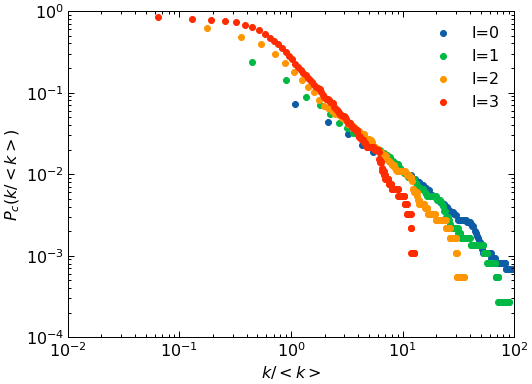

In [10]:
plot_ccdf(G0,lb='l=0')
plot_ccdf(G1,lb='l=1')
plot_ccdf(G2,lb='l=2')
plot_ccdf(G3,lb='l=3')

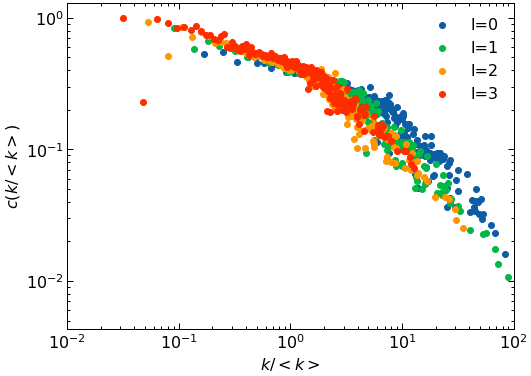

In [11]:
clustering_per_kl(G0,lb='l=0')
clustering_per_kl(G1,lb='l=1')
clustering_per_kl(G2,lb='l=2')
clustering_per_kl(G3,lb='l=3')

(0.01, 10)

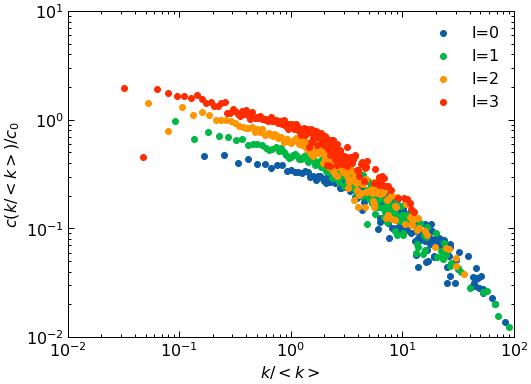

In [12]:
clustering_per_kl_c0(G0,lb='l=0')
clustering_per_kl_c0(G1,lb='l=1')
clustering_per_kl_c0(G2,lb='l=2')
clustering_per_kl_c0(G3,lb='l=3')
plt.ylim(bottom=10**(-2),top=10)

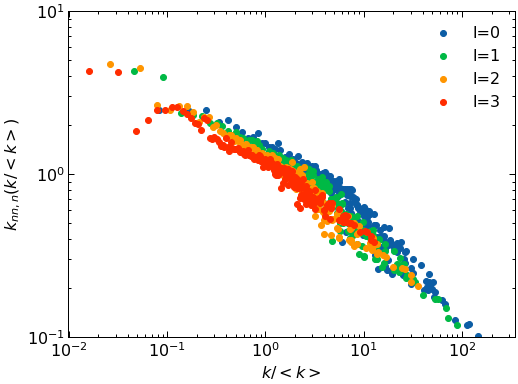

In [13]:
average_neighbor_degree_x_kl(G0,lb='l=0')
average_neighbor_degree_x_kl(G1,lb='l=1')
average_neighbor_degree_x_kl(G2,lb='l=2')
average_neighbor_degree_x_kl(G3,lb='l=3')